In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

from datetime import datetime

In [2]:
segments = pd.read_csv("covid19_superdata.csv")

In [11]:
#get just the dates in brown, dane, and milwaukee county. all of these are counties are in wisconsin.
brown = segments[segments.countyFIPS==55009].iloc[:,4:-1]

dane = segments[segments.countyFIPS==55025].iloc[:,4:-1]

milwaukee = segments[segments.countyFIPS==55079].iloc[:,4:-1]

## Cases for Each County Compared:

In [22]:
#remove suffixes and convert to datetime
brown_cases = brown.filter(regex='_x')
brown_cases.columns = brown_cases.columns.str.rstrip('_x')
brown_cases.columns = pd.to_datetime(brown_cases.columns)
brown_cases_week = brown_cases.T.reset_index()
brown_cases_week = brown_cases_week.assign(Weeks = brown_cases_week['index']).drop(columns = 'index')
brown_cases_week['Weeks'] = brown_cases_week['Weeks'].astype('datetime64[ns]')
#get mean cases per week
brown_cases_week_mean = brown_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
brown_cases_week_mean = brown_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
brown_cases_new_week_mean = brown_cases_week_mean.sum(axis=1).diff()

#remove suffixes and convert to datetime
dane_cases = dane.filter(regex='_x')
dane_cases.columns = dane_cases.columns.str.rstrip('_x')
dane_cases.columns = pd.to_datetime(dane_cases.columns)
dane_cases_week = dane_cases.T.reset_index()
dane_cases_week = dane_cases_week.assign(Weeks = dane_cases_week['index']).drop(columns = 'index')
dane_cases_week['Weeks'] = dane_cases_week['Weeks'].astype('datetime64[ns]')
#get mean cases per week
dane_cases_week_mean = dane_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
dane_cases_week_mean = dane_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
dane_cases_new_week_mean = dane_cases_week_mean.sum(axis=1).diff()

milwaukee_cases = milwaukee.filter(regex='_x')
milwaukee_cases.columns = milwaukee_cases.columns.str.rstrip('_x')
milwaukee_cases.columns = pd.to_datetime(milwaukee_cases.columns)
milwaukee_cases_week = milwaukee_cases.T.reset_index()
milwaukee_cases_week = milwaukee_cases_week.assign(Weeks = milwaukee_cases_week['index']).drop(columns = 'index')
milwaukee_cases_week['Weeks'] = milwaukee_cases_week['Weeks'].astype('datetime64[ns]')
#get mean cases per week
milwaukee_cases_week_mean = milwaukee_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
milwaukee_cases_week_mean = milwaukee_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
milwaukee_cases_new_week_mean = milwaukee_cases_week_mean.sum(axis=1).diff()

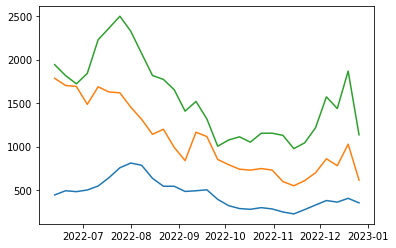

In [36]:
#raw data
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.plot(brown_cases_new_week_mean)
ax1.plot(dane_cases_new_week_mean)
ax1.plot(milwaukee_cases_new_week_mean)

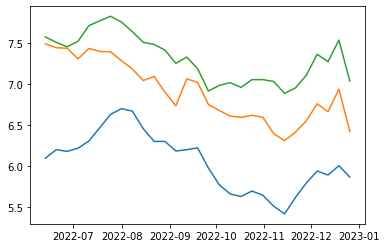

In [40]:
#log normalized data
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.plot(brown_cases_new_week_mean.apply(np.log))
ax1.plot(dane_cases_new_week_mean.apply(np.log))
ax1.plot(milwaukee_cases_new_week_mean.apply(np.log))

The data trends similarly to the country data for these counties. Spiking around the Thanksgiving, and Christmas.

## Deaths for Each County Compared

In [41]:
#remove suffixes and convert to datetime
brown_deaths = brown.filter(regex='_y')
brown_deaths.columns = brown_deaths.columns.str.rstrip('_y')
brown_deaths.columns = pd.to_datetime(brown_deaths.columns)
brown_deaths_week = brown_deaths.T.reset_index()
brown_deaths_week = brown_deaths_week.assign(Weeks = brown_deaths_week['index']).drop(columns = 'index')
brown_deaths_week['Weeks'] = brown_deaths_week['Weeks'].astype('datetime64[ns]')
#get mean deaths per week
brown_deaths_week_mean = brown_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
brown_deaths_week_mean = brown_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
brown_deaths_new_week_mean = brown_deaths_week_mean.sum(axis=1).diff()

#remove suffixes and convert to datetime
dane_deaths = dane.filter(regex='_y')
dane_deaths.columns = dane_deaths.columns.str.rstrip('_y')
dane_deaths.columns = pd.to_datetime(dane_deaths.columns)
dane_deaths_week = dane_deaths.T.reset_index()
dane_deaths_week = dane_deaths_week.assign(Weeks = dane_deaths_week['index']).drop(columns = 'index')
dane_deaths_week['Weeks'] = dane_deaths_week['Weeks'].astype('datetime64[ns]')
#get mean deaths per week
dane_deaths_week_mean = dane_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
dane_deaths_week_mean = dane_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
dane_deaths_new_week_mean = dane_deaths_week_mean.sum(axis=1).diff()

milwaukee_deaths = milwaukee.filter(regex='_y')
milwaukee_deaths.columns = milwaukee_deaths.columns.str.rstrip('_y')
milwaukee_deaths.columns = pd.to_datetime(milwaukee_deaths.columns)
milwaukee_deaths_week = milwaukee_deaths.T.reset_index()
milwaukee_deaths_week = milwaukee_deaths_week.assign(Weeks = milwaukee_deaths_week['index']).drop(columns = 'index')
milwaukee_deaths_week['Weeks'] = milwaukee_deaths_week['Weeks'].astype('datetime64[ns]')
#get mean deaths per week
milwaukee_deaths_week_mean = milwaukee_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
milwaukee_deaths_week_mean = milwaukee_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
milwaukee_deaths_new_week_mean = milwaukee_deaths_week_mean.sum(axis=1).diff()

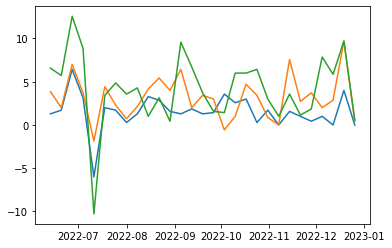

In [42]:
#raw data
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.plot(brown_deaths_new_week_mean)
ax1.plot(dane_deaths_new_week_mean)
ax1.plot(milwaukee_deaths_new_week_mean)

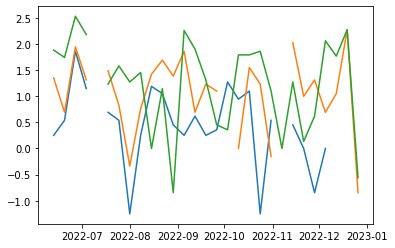

In [11]:
#log normalized data
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.plot(brown_deaths_new_week_mean.apply(np.log))
ax1.plot(dane_deaths_new_week_mean.apply(np.log))
ax1.plot(milwaukee_deaths_new_week_mean.apply(np.log))

The data trends similarly to the country data for these counties. Spiking around the Thanksgiving, and Christmas.